1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np

In [2]:
sample_mean = 2.0
sample_std = 0.2
sample_size = 900
samples = np.random.normal(sample_mean, sample_std, sample_size)

Text(0.5, 0, 'Sample Value')

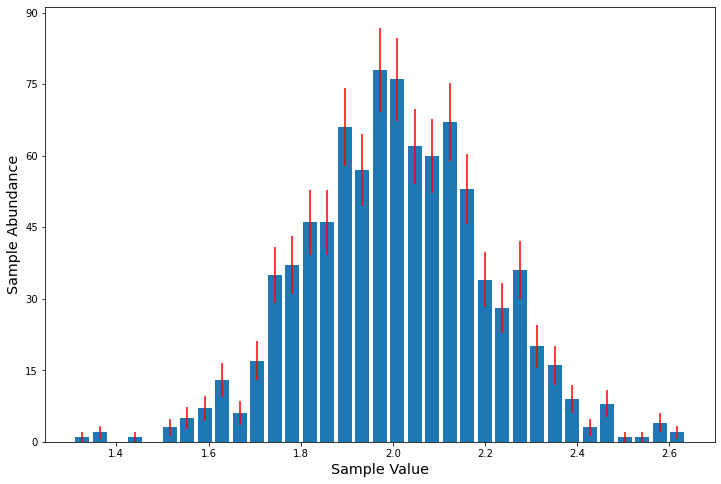

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sample_abd,edges = np.histogram(samples, bins=35)
yRange = [int(sample_abd.min()), int(sample_abd.max())]
yRange = list(range(yRange[0], yRange[1]+15,15))
plt.bar(0.5*(edges[:-1] + edges[1:]), sample_abd, width=0.03, yerr=np.sqrt(sample_abd), ecolor='red')
plt.ylabel("Sample Abundance", fontsize='x-large')
plt.yticks(yRange);
plt.xlabel('Sample Value', fontsize='x-large')

In [45]:
from scipy.stats import norm
def GaussianOnSamples(InSample, InDomain, InWidth=None):
    if InWidth is None:
        InWidth = 1.06 * InSample.std() / (InSample.size)**(0.2)
    return np.array([norm.pdf(InDomain, x, InWidth) for x in InSample])

In [68]:
from scipy.integrate import trapz
Width = 1.06 * samples.std() / (samples.size)**(0.2)
Domain = np.linspace(samples.min() - 5 * Width,samples.max() + 5* Width,200)
KDE = GaussianOnSamples(Domain, samples, Width)
NormalizeCoeff = trapz(KDE.sum(axis=1),Domain)
print( trapz(KDE.sum(axis=1),Domain) / NormalizeCoeff)

1.0


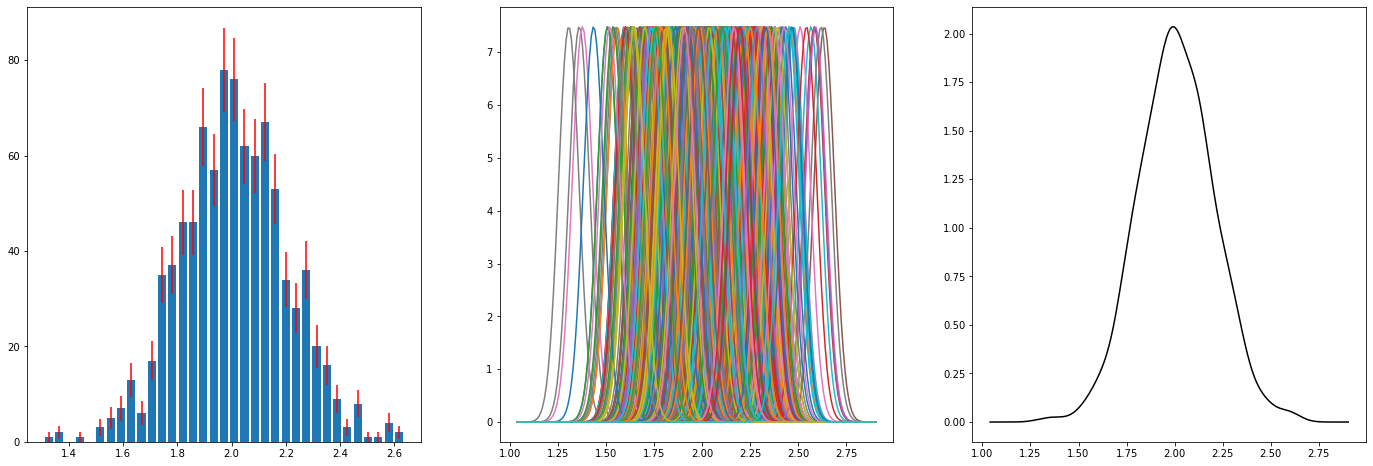

In [69]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
plt.bar(0.5*(edges[:-1] + edges[1:]), sample_abd, width=0.03, yerr=np.sqrt(sample_abd), ecolor='red')
plt.subplot(1,3,2)
for i in range(samples.size):
    plt.plot(Domain, KDE[:,i])
plt.subplot(1,3,3)
plt.plot(Domain, KDE.sum(axis=1) / NormalizeCoeff, color='k')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2021-05-29 20:56:25--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6026:18::a27d:4612, 162.125.70.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6026:18::a27d:4612|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2021-05-29 20:56:26--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdce7ab83ad4d02f7db74a9f71e.dl.dropboxusercontent.com/cd/0/inline/BPYbt9VjO_hSbUM_Q_bPT01MHrzEPwrQHj8W3STrStj8WWxV3rKp3vOlmcw55W53ea6_s-mbruFr47U8ZNvyJMmuTxpgLWe3jBs0KAM-a9ghcpKuLYE2kGZbpfvR77NUDm_VZV5YG3aM0FVsirByMDE8/file# [following]
--2021-05-29 20:56:26--  https://ucdce7ab83ad4d02f7db74a9f71e.dl.dropboxusercontent.com/cd/0/inline/BPYbt9VjO_hSbU

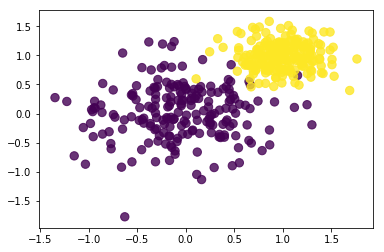

In [70]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

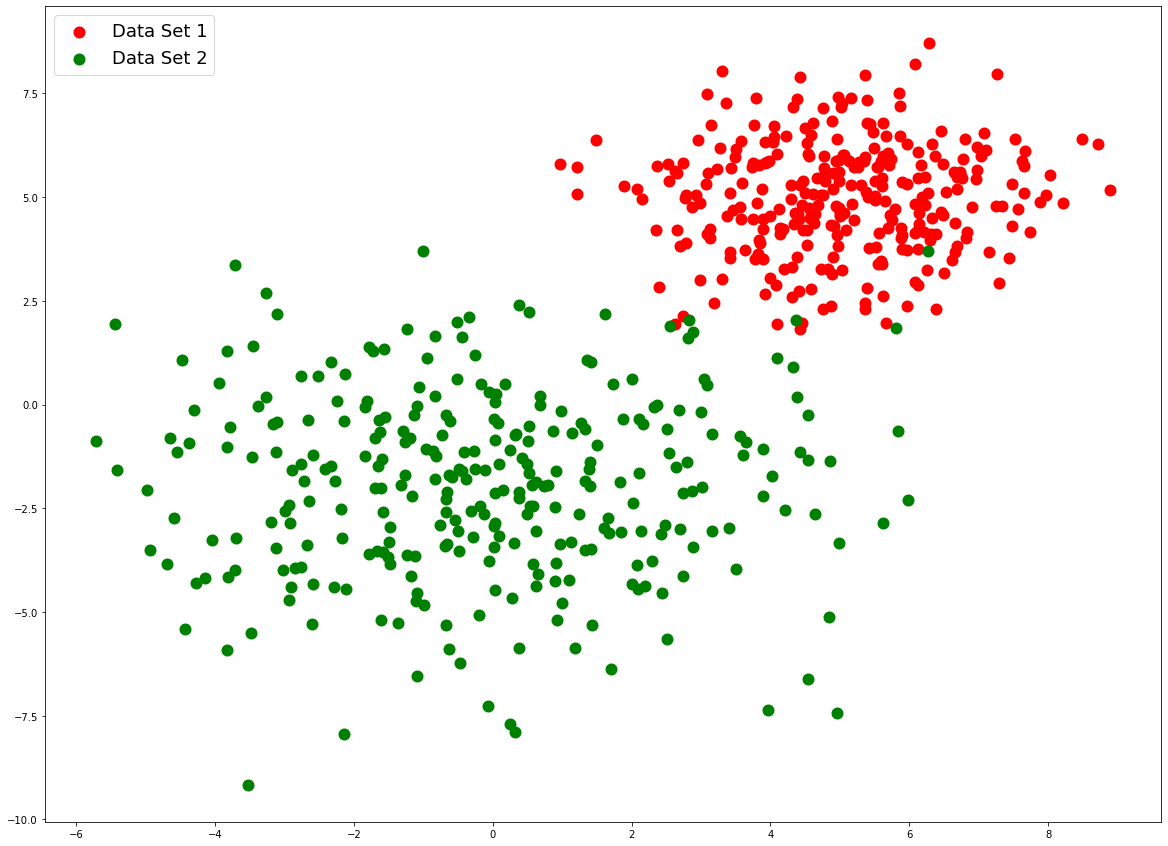

In [116]:
DataSet1 = np.random.multivariate_normal(size=300, mean=[5,5], cov=np.diag([2,2]))
DataSet2 = np.random.multivariate_normal(size=300, mean=[0,-2], cov=np.diag([6,5]))

plt.figure(figsize=[20,15])
plt.scatter(DataSet1[:,0],DataSet1[:,1], color='r', linewidths=6, label="Data Set 1")
plt.scatter(DataSet2[:,0],DataSet2[:,1], color='g', linewidths=6, label="Data Set 2")
plt.legend(fontsize=18)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [155]:
from scipy.stats import linregress
import seaborn
import pandas as pd
import numpy as np

In [117]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2021-05-29 21:11:30--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6026:18::a27d:4612, 162.125.70.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6026:18::a27d:4612|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2021-05-29 21:11:30--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0af65a63501fe3233be3f53de8.dl.dropboxusercontent.com/cd/0/inline/BPbh0AoTLyWhQoe6j-EMC846mwB5XXvp2Dz0YP_Lm6U8kxnh7Jptp5TR4hwJ4dYiVlvf92H0qVLB-Kq-ZscKTUbEoP2QbSIlcpo-4rRfMNl-93qog7cmh4AMBF4tIJJnHjwtFDrFON-EnKgXtnctw4in/file# [following]
--2021-05-29 21:11:31--  https://uc0af65a63501fe3233be3f53de8.dl.dropboxusercontent.com/cd/0/inline/BPbh0AoTLyWhQoe6j-EMC846mwB5XXvp2Dz0YP_Lm6U8kxnh7Jptp5TR

In [187]:
temp = np.load('residuals_261.npy', allow_pickle=True)

In [188]:
data = pd.DataFrame(temp.item())

In [223]:
data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [190]:
PickUs = np.abs(data['residuals']) < 2
cleaned = data[PickUs]

In [191]:
m, y0, _, _, _ = linregress(cleaned["residuals"],cleaned["distances"])

In [192]:
seaborn.set_theme()

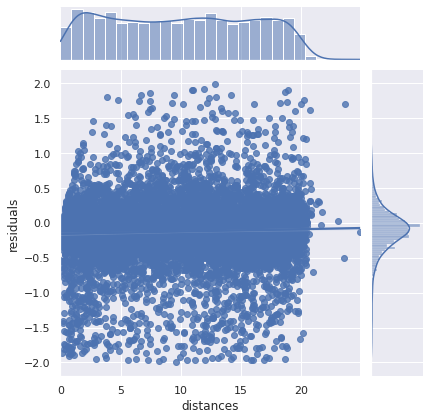

In [193]:
seaborn.jointplot(data=cleaned, x="distances", y="residuals", kind="reg");

In [248]:
# The X must range from 0 to 20
dxHalf = cleaned['distances'].max() - 20
X0 = cleaned['distances'].min() + dxHalf
X1 = cleaned['distances'].max() - dxHalf
NBins = 15
x = np.linspace(X0, X1, NBins)
xedges = np.empty((x.size + 1,))
xedges[:-1] = x[:] - dxHalf
xedges[-1] = x[-1] + dxHalf
y = np.zeros_like(x)
erry = np.zeros_like(x)

for i in range(x.size):
    TEMP = cleaned.loc[(cleaned['distances'] >= xedges[i]) & (cleaned['distances'] <= xedges[i+1])]
    y[i] = int(TEMP.size)
    erry[i] = TEMP['residuals'].std()
    del TEMP

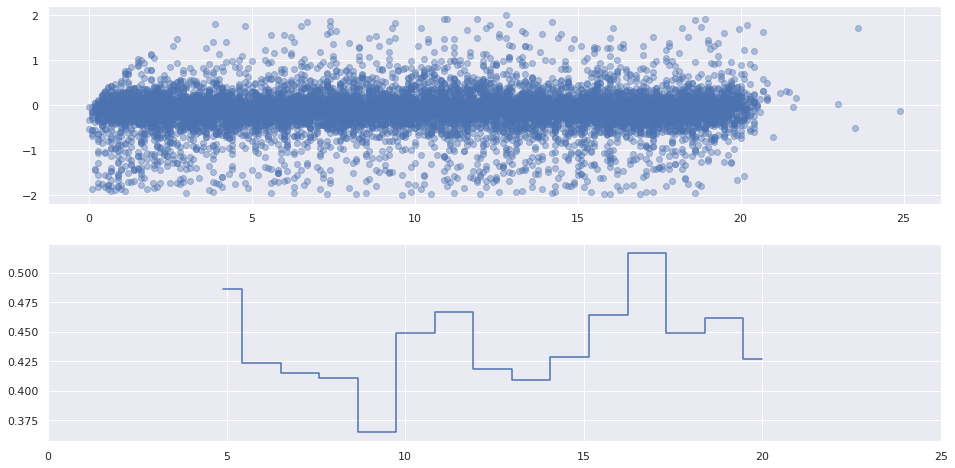

In [251]:
plt.figure(figsize=(16, 8))
plt.subplot(2,1,1)
plt.scatter(cleaned['distances'], cleaned['residuals'], alpha=0.4)
plt.subplot(2,1,2)
plt.step(x, erry, where='mid')
plt.xlim((0,25));